In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import adjusted_rand_score
import pandas as pd
from sklearn.model_selection import train_test_split

In [40]:
# load the Pima Indians Diabetes dataset
data = pd.read_csv('/content/IRIS.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [41]:
# separate the features (X) and targets (y)
X = data.drop('species', axis=1).values
y = data['species'].values
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [50]:
# Define DBSCAN function
def dbscan(X, eps, min_samples):
    # Initialize labels to -1 (unassigned)
    labels = np.full(X.shape[0], -1)
    
    # Initialize cluster index to 0
    cluster_idx = 0
    
    # Initialize core points, border points, and noise points
    core_points = np.zeros(X.shape[0], dtype=bool)
    border_points = np.zeros(X.shape[0], dtype=bool)
    noise_points = np.zeros(X.shape[0], dtype=bool)
    
    # Iterate over each point
    for i in range(X.shape[0]):
        # If the point has already been assigned to a cluster, skip it
        if labels[i] != -1:
            continue
        


        # Find all points within eps distance of the current point
        neighbors = []
        for j in range(X.shape[0]):
            if np.linalg.norm(X[j] - X[i]) < eps:
                neighbors.append(j)
        

        # If the number of neighbors is less than min_samples, assign the point as noise
        if len(neighbors) < min_samples:
            labels[i] = -2
            noise_points[i] = True
            continue
        

        # Assign the current point to the current cluster and mark it as a core point
        labels[i] = cluster_idx
        core_points[i] = True
        

        # Expand the cluster by finding all reachable points within eps distance of the current point
        j = 0
        while j < len(neighbors):
            neighbor_idx = neighbors[j]
            
            if labels[neighbor_idx] == -2:
                labels[neighbor_idx] = cluster_idx
                noise_points[neighbor_idx] = True
            
            elif labels[neighbor_idx] == -1:
                labels[neighbor_idx] = cluster_idx
                new_neighbors = []
                for k in range(X.shape[0]):
                    if np.linalg.norm(X[k] - X[neighbor_idx]) < eps:
                        new_neighbors.append(k)
        
                
                if len(new_neighbors) >= min_samples:
                    neighbors += new_neighbors
                    if not core_points[neighbor_idx]:
                        core_points[neighbor_idx] = True
                        border_points[neighbor_idx] = False
                else:
                    border_points[neighbor_idx] = True
            
            j += 1
        
        # Increment the cluster index
        cluster_idx += 1
    
    # Print the indices of core points, border points, and noise points
    core_indices = np.where(core_points)[0]
    border_indices = np.where(border_points)[0]
    noise_indices = np.where(noise_points)[0]
    print('Indices of core points:', core_indices)
    print("*************************************************")
    print('Indices of border points:', border_indices)
    print("*************************************************")
    print('Indices of noise points:', noise_indices)
    print("*************************************************")
    n_core_points = np.sum(core_points)
    n_border_points = np.sum(border_points)
    n_noise_points = np.sum(noise_points)
    print("*************************************************")
    print('Number of core points:', n_core_points)
    print('Number of border points:', n_border_points)
    print('Number of noise points:', n_noise_points)
    
    return labels, core_points, border_points, noise_points

In [51]:
# Perform DBSCAN clustering
eps = 0.7
min_samples = 6
labels, core_points, border_points, noise_points = dbscan(X, eps, min_samples)

Indices of core points: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  58  59  61  62  63  64  65  66  67  69  70  71  72  73  74  75
  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  94
  95  96  97  99 100 101 102 103 104 105 107 108 110 111 112 113 114 115
 116 119 120 121 123 124 125 126 127 128 130 132 133 136 137 138 139 140
 141 142 143 144 145 146 147 148 149]
*************************************************
Indices of border points: [ 41  60  68  93 109 118 122 129 134 135]
*************************************************
Indices of noise points: [ 57  98 106 117 131]
*************************************************
*************************************************
Number of core points: 135
Number of border points: 10
Number of noise points: 5


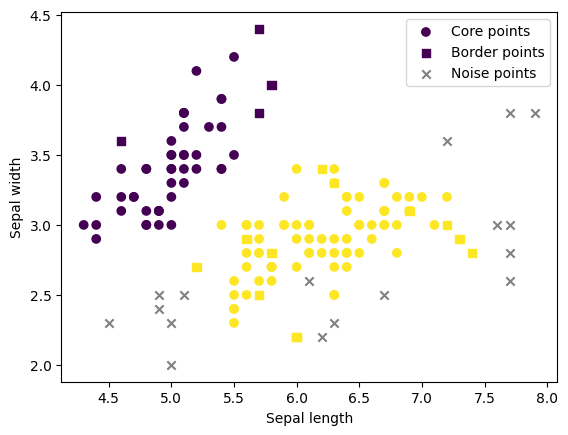

In [44]:
# Plot the results
plt.scatter(X[core_points, 0], X[core_points, 1], c=labels[core_points], marker='o')
plt.scatter(X[border_points, 0], X[border_points, 1], c=labels[border_points], marker='s')
plt.scatter(X[noise_points, 0], X[noise_points, 1], c='gray', marker='x')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend(['Core points', 'Border points', 'Noise points'])
plt.show()

In [45]:
# Calculate ARI
Accuracy = adjusted_rand_score(y, labels)

In [46]:
print("Accuracy:",Accuracy)

Accuracy: 0.5206185241703302
